### OVERVIEW of Greedy and Beam Seach in NLP:

*Greedy search and Beam search* are types of **decoding algorithms** used in Natural Language Processing (NLP), particularly in tasks that involve sequence generation. This includes areas like machine translation, text summarization, image captioning, and language modeling.


**1. Machine Translation Example:**

    Task: Translate the English sentence "I am going home" into French.

A. Greedy Search Example:

    Step 1: The model predicts the first word in French. It might choose "Je" with the highest probability.

    Step 2: For the next word, the model predicts based on "Je". It might choose "vais" as the most probable next word.

    Step 3: The process continues until the model predicts "Je vais à la maison" ("I am going home").

    **Outcome:** The translation is "Je vais à la maison" because at each step, only the word with the highest probability was chosen.


B. Beam Search Example:

    Step 1: The model predicts multiple possible first words, like "Je" and "Moi". It keeps track of both.

    Step 2: For each of these, the model predicts possible next words, like "vais" for "Je" and "suis" for "Moi". The model keeps the top combinations, e.g., "Je vais" and "Moi suis".

    Step 3: This continues, with the model keeping track of multiple possible translations simultaneously.

    **Outcome:** After evaluating all possible sequences, the model might output a more accurate translation, such as "Je rentre chez moi" ("I am going home"), which could be more natural in French.


**2. Text Summarization Example:**


Task: Summarize the text "The company’s profits increased due to higher sales in the international market."


A. Greedy Search Example:

    Step 1: The model predicts the most likely first word for the summary, like "Company".

    Step 2: The model then predicts the next word, such as "profits".

    Step 3: This process continues, leading to a summary like "Company profits increased."

    **Outcome:** The summary is concise but might miss out on important details.

Beam Search Example:

    Step 1: The model generates multiple possible first words, like "Company" and "Profits".

    Step 2: For each first word, the model predicts several possible next words, keeping the top sequences.

    Step 3: The model might explore different ways to express the key information.

    ** Outcome:** The final summary might be "Company profits rose due to higher international sales," which captures more details and provides a clearer summary.


**Summary:**

Greedy Search: A simple, fast approach that picks the most likely word at each step, often leading to less accurate or less fluent outputs.

Beam Search: A more complex approach that considers multiple sequences, leading to better overall quality in tasks like translation or summarization.


Both are essential decoding techniques in sequence-to-sequence tasks in NLP, where the goal is to generate a coherent sequence (like a sentence) from a model's output probabilities.

In [2]:
!pip install kaggle

In [3]:
pwd

'/content'

In [4]:
mkdir .kaggle

mkdir: cannot create directory ‘.kaggle’: File exists


In [5]:
ls -la

total 20
drwxr-xr-x 1 root root 4096 Aug 31 10:54 ./
drwxr-xr-x 1 root root 4096 Aug 31 10:52 ../
drwxr-xr-x 4 root root 4096 Aug 29 13:22 .config/
drwxr-xr-x 2 root root 4096 Aug 31 10:54 .kaggle/
drwxr-xr-x 1 root root 4096 Aug 29 13:22 sample_data/


In [6]:
cd /root

/root


In [7]:
ls -la

total 72
drwx------ 1 root root 4096 Aug 31 10:52 ./
drwxr-xr-x 1 root root 4096 Aug 31 10:52 ../
-r-xr-xr-x 1 root root 1169 Jan  1  2000 .bashrc*
drwxr-xr-x 1 root root 4096 Aug 29 13:40 .cache/
drwxr-xr-x 3 root root 4096 Aug 29 13:40 .config/
drwxr-xr-x 1 root root 4096 Aug 29 13:40 .ipython/
drwx------ 1 root root 4096 Aug 29 13:40 .jupyter/
drwxr-xr-x 2 root root 4096 Aug 31 10:52 .keras/
drwx------ 3 root root 4096 Aug 29 13:15 .launchpadlib/
drwxr-xr-x 1 root root 4096 Aug 29 13:40 .local/
drwxr-xr-x 4 root root 4096 Aug 29 13:40 .npm/
-rw-r--r-- 1 root root  161 Jul  9  2019 .profile
-r-xr-xr-x 1 root root  254 Jan  1  2000 .tmux.conf*
-rw-r--r-- 1 root root  211 Aug 29 13:40 .wget-hsts


In [8]:
!mkdir .kaggle

In [9]:
cd /root/.kaggle

/root/.kaggle


In [10]:
!cp /content/.kaggle/kaggle.json /root/.kaggle/kaggle.json

cp: cannot stat '/content/.kaggle/kaggle.json': No such file or directory


In [11]:
ls -la

total 12
drwxr-xr-x 2 root root 4096 Aug 31 10:55 ./
drwx------ 1 root root 4096 Aug 31 10:55 ../


In [12]:
cd /content

/content


In [13]:
!chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [15]:
!kaggle datasets download -d shymammoth/shopee-reviews -p /content/shopee_csv

Dataset URL: https://www.kaggle.com/datasets/shymammoth/shopee-reviews
License(s): CC0-1.0
 98% 43.0M/43.7M [00:02<00:00, 28.8MB/s]
100% 43.7M/43.7M [00:02<00:00, 21.0MB/s]


In [16]:
cd shopee_csv/

/content/shopee_csv


In [17]:
!unzip '/content/shopee_csv/shopee-reviews.zip'

Archive:  /content/shopee_csv/shopee-reviews.zip
  inflating: shopee_reviews.csv      


In [18]:
import pandas as pd
import numpy as np
import re
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

tqdm.pandas()
sns.set_style('dark')
plt.rcParams['figure.figsize'] = (20,8)
plt.rcParams['font.size'] = 14

### Introduction to Language Modelling

Language Modelling is the usage of various statistical, probabilistic and machine learning driven techniques to determine the probability of a given sequence of words occurring in a sentence. Language models analyze bodies of text data to provide a basis for their word predictions.

1. Language models determine word probability by analyzing text data. They interpret this data by feeding it through an algorithm that establishes rules for context in natural language. Then, the model applies these rules in language tasks to accurately predict or produce new sentences. The model essentially learns the features and characteristics of basic language and uses those features to understand new phrases.

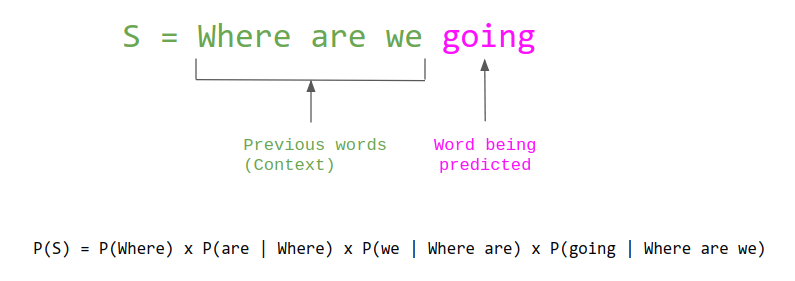

2. More complex language models are better at NLP tasks, because language itself is extremely complex and always evolving.

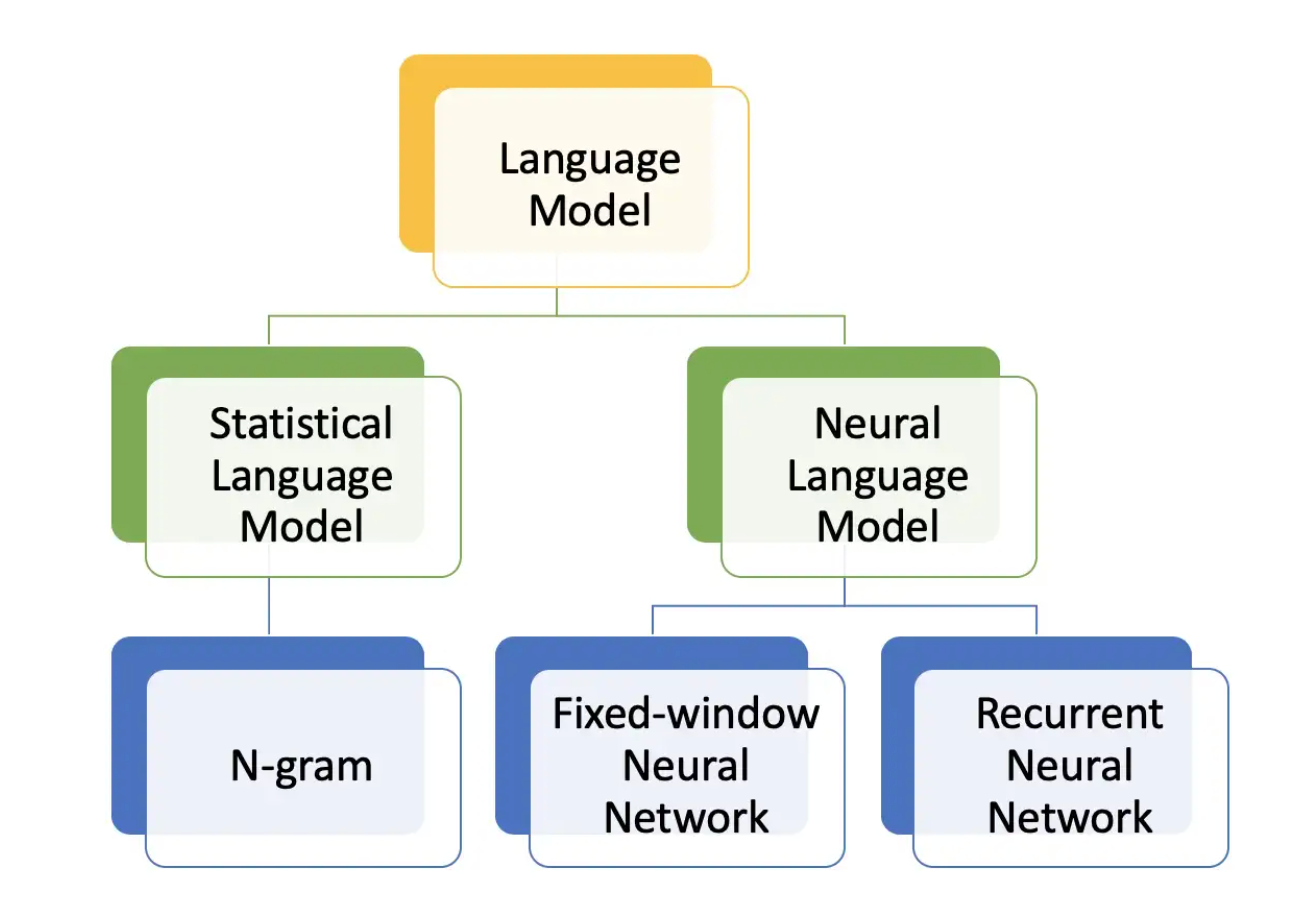


In [21]:
data = pd.read_csv("/content/shopee_csv/shopee_reviews.csv")
# This randomly selects 100,000 rows from the DataFrame data. The sampling is done without replacement, meaning each row is only selected once.
data = data.sample(100000).reset_index(drop=True)
data.head()

<ipython-input-21-8a5434385c42>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/shopee_csv/shopee_reviews.csv")


,label,text
0,3,Product look like the picture but its flimsy a...
1,5,Fast delivery and Value for money. Really does...
2,5,"Works as described. Easy to use, clean and sto..."
3,5,Eventhough small buy like the item. Silicon qu...
4,5,"the products looks good,later try fixing it.bu..."


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   label   100000 non-null  object
 1   text    100000 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


### Text Preprocessing

1. Preprocessing of text data varies from one NLP task to another

2. Typically in text classification tasks, you remove the stopwords from the sentence and also stem or lemmatize the words to their corresponding root words to reduce the vocabulary size. However, in language modelling we will refrain from doing so as these words can help our model undertand the underlying semantics of the language for it to produce texts of its own

3. Therefore we will limit our text preprocessing to the following steps:
    a. Remove any extra lines or spaces from the text

    b. Remove any characters other than alphabets, numbers or period

    c. Tokenize the text

    d. Add a start and end token for the model to identify when the sentence starts and ends


In [23]:
def text_cleaning(x):

    text = re.sub('\s+\n+', ' ', x)
    text = re.sub('[^a-zA-Z0-9\.]', ' ', text)
    text = text.split()

    text = [word for word in text]
    text = ' '.join(text)
    text = 'startseq '+text+' endseq'

    return text

In [24]:
#apply anbove function in 'text' column in csv
data['text'] = data['text'].progress_apply(text_cleaning)

100%|██████████| 100000/100000 [00:01<00:00, 88878.59it/s]


In [25]:
data['text'].head(10)

,text
0,startseq Product look like the picture but its...
1,startseq Fast delivery and Value for money. Re...
2,startseq Works as described. Easy to use clean...
3,startseq Eventhough small buy like the item. S...
4,startseq the products looks good later try fix...
5,startseq Received thank you nnnnnnnnnnnndjdbdk...
6,startseq Item well packed delivered within 3 d...
7,startseq Nicely packaged though NOT really an ...
8,startseq Fast delivery.. Big bottle.. Already ...
9,startseq Quick and prompt customer service as ...


In [26]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import Sequence
from tensorflow.keras.utils import to_categorical

### Train-Val-Test Split

Train: 85000

Val: 10000

Test: 5000

Since the datapoints were randomly sampled, we can go ahead and slice them using the indexes

1. train = data.iloc[:85000, :]: Selects the first 85,000 rows of data for the training set. The : after the comma means that all columns are included.


2. val = data.iloc[85000:95000, :].reset_index(drop=True): Selects rows 85,000 to 94,999 (the next 10,000 rows) for the validation set and then resets the index of this subset to start from 0. drop=True ensures that the old index is not added as a new column.


3. test = data.iloc[95000:, :].reset_index(drop=True): Selects rows from 95,000 to the end for the test set and resets the index similarly.

In [27]:
train = data.iloc[:85000, :]
val = data.iloc[85000:95000, :].reset_index(drop=True)
test = data.iloc[95000:, :].reset_index(drop=True)

### Tokenization


We will first fit the tokenizer on the entire train data to identify the vocabulary size. Then we will do our own analysis to identify the ideal vocab size

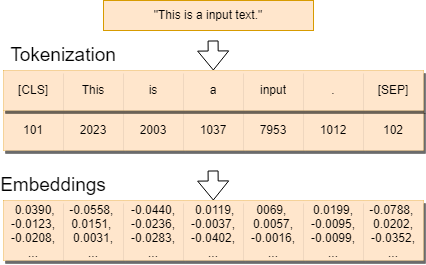

1. tokenizer = Tokenizer(oov_token='<OOV>'): Initializes a Tokenizer object from a library like TensorFlow/Keras. The oov_token='<OOV>' parameter specifies an out-of-vocabulary (OOV) token to handle words that are not in the tokenizer's vocabulary. This is useful for dealing with words not seen during training.

2. tokenizer.fit_on_texts(train['text'].tolist()): Trains the tokenizer on the text data in the train DataFrame's 'text' column. It converts each word in the texts into a unique integer index, building the tokenizer's vocabulary based on the words present in the training data.

3. max_length = max(len(caption.split()) for caption in train['text'].tolist()): Computes the maximum length of the texts in terms of the number of words. It splits each text (caption) into words, calculates the length of each text, and finds the maximum length across all texts in the training set. This max_length is often used for padding or truncating sequences to ensure they are of uniform length when feeding them into a model.

In [28]:
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(train['text'].tolist())
max_length = max(len(caption.split()) for caption in train['text'].tolist())

### Sorting the words in vocabulary by their count

**Why We Use This:**

1. Vocabulary Analysis: Helps in understanding which words are most common in the dataset. This can be useful for feature selection, understanding the text distribution, and potentially deciding on which words to focus on or exclude.

2. Frequency Distribution: Provides insight into the frequency of words, which can inform decisions about preprocessing steps, such as removing very common or rare words.

3. Data Exploration: Essential for exploring and visualizing the text data to gain insights before training models. It can help identify any anomalies or patterns in the word usage that could affect model performance.

In [29]:
df_vocab = pd.DataFrame(list(tokenizer.word_counts.items()), columns=['word','count'])
df_vocab.sort_values(by='count', ascending=False, inplace=True, ignore_index=True)
df_vocab.head()

,word,count
0,endseq,85000
1,startseq,85000
2,the,46264
3,and,37593
4,good,35172


# **Wordcloud Visualization of the Vocabulary**

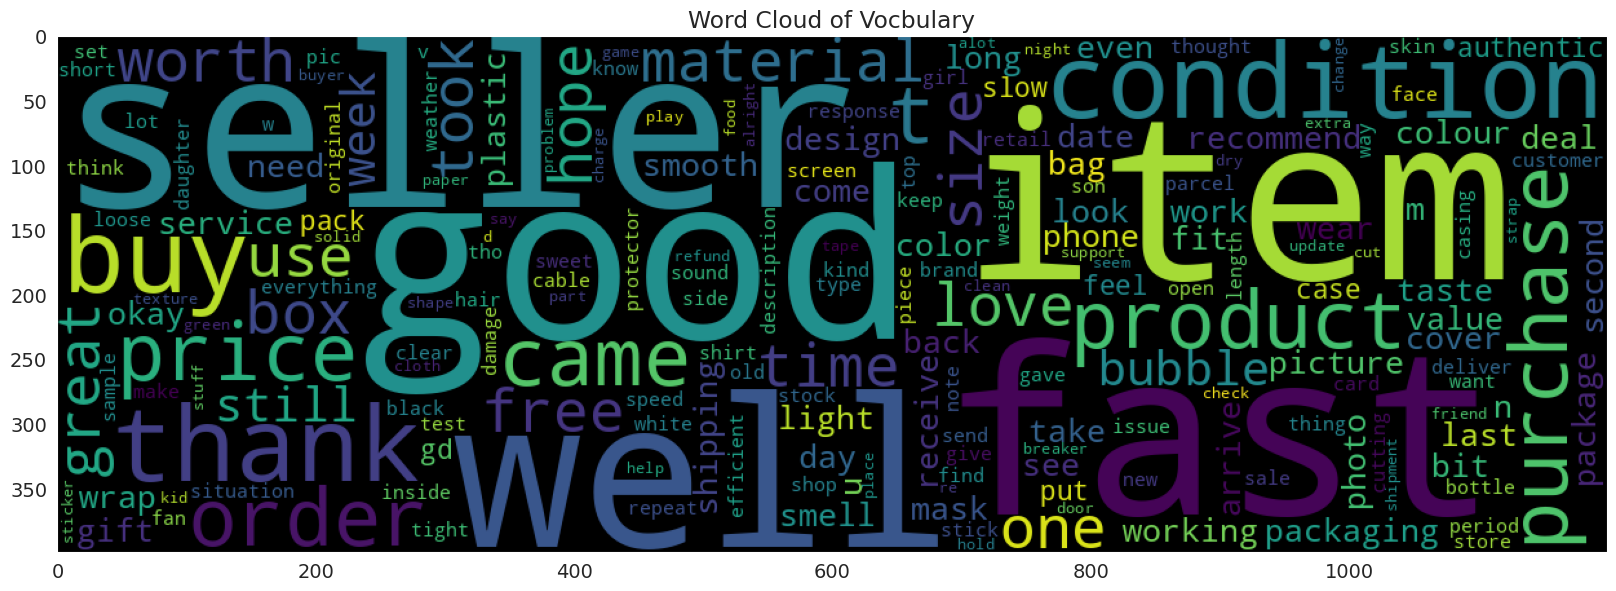

In [30]:
words = ""
words += " ".join(df_vocab['word'].tolist())+" "
wordcloud = WordCloud(width = 1200, height = 400,
                background_color ='black',
                min_font_size = 10).generate(words)

plt.imshow(wordcloud)
plt.title('Word Cloud of Vocbulary')
plt.show()

In [31]:
df_vocab.describe()

,count
count,19540.000000
mean,75.442784
std,1193.537293
min,1.000000
25%,1.000000
50%,2.000000
75%,7.000000
max,85000.000000


**Descriptive Stats of Vocab word counts**

1. Here we are able to see that most of the words present in our vocab i.e. about 75% of them occur very infrequently in the sentences (about 7 times at most).

2. Therefore lets try to limit the number of words in our vocab where they atleast appear 50 times in the entire corpus

In [32]:
df_vocab[df_vocab['count']>=50]

,word,count
0,endseq,85000
1,startseq,85000
2,the,46264
3,and,37593
4,good,35172
...,...,...
1634,pattern,50
1635,patch,50
1636,text,50
1637,company,50


**We fit the Tokenizer to the limit vocab size**


Note: Any words that are not present in this limited vocab will be regarded as OOV or out of vocabulary

In [33]:
vocab_size = len(df_vocab[df_vocab['count']>=50])
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(train['text'].tolist())

**Why We Do This:**

1. Reduce Vocabulary Size: By setting num_words to a specific value, you limit the vocabulary to only the most frequent words. This helps manage the size of the vocabulary and reduces the dimensionality of the text data, which can improve model efficiency and performance.

2. Handle Rare Words: Words that occur infrequently are excluded from the vocabulary, which can help reduce noise and focus on more relevant and frequent terms.

3. Control Overfitting: A smaller, more focused vocabulary can help prevent overfitting by not allowing the model to learn from too many rare or less informative words.


In summary, this approach ensures that the tokenizer only considers the most important words, making the model more manageable and potentially improving its performance by reducing complexity.

### Sentence Length Analysis


We need to both pad and truncated our sentences to a fixed length
In order to identify the ideal sentence length, we will do an IQR analysis of the sentence lengths


In [34]:
data['length'] = data['text'].progress_apply(lambda x: len(x.split(' ')))

100%|██████████| 100000/100000 [00:00<00:00, 243497.28it/s]


**Why We Do This:**

1. Feature Engineering: Adding the length of the text as a feature can be useful for various NLP tasks. Text length can provide important context for understanding and processing the text.

2. Data Analysis: Knowing the length of each text entry can help with analyzing the distribution of text lengths in your dataset, which can inform preprocessing and modeling decisions.

3. Preprocessing: Text length can be used for filtering or truncating texts, or for setting maximum lengths for model input.

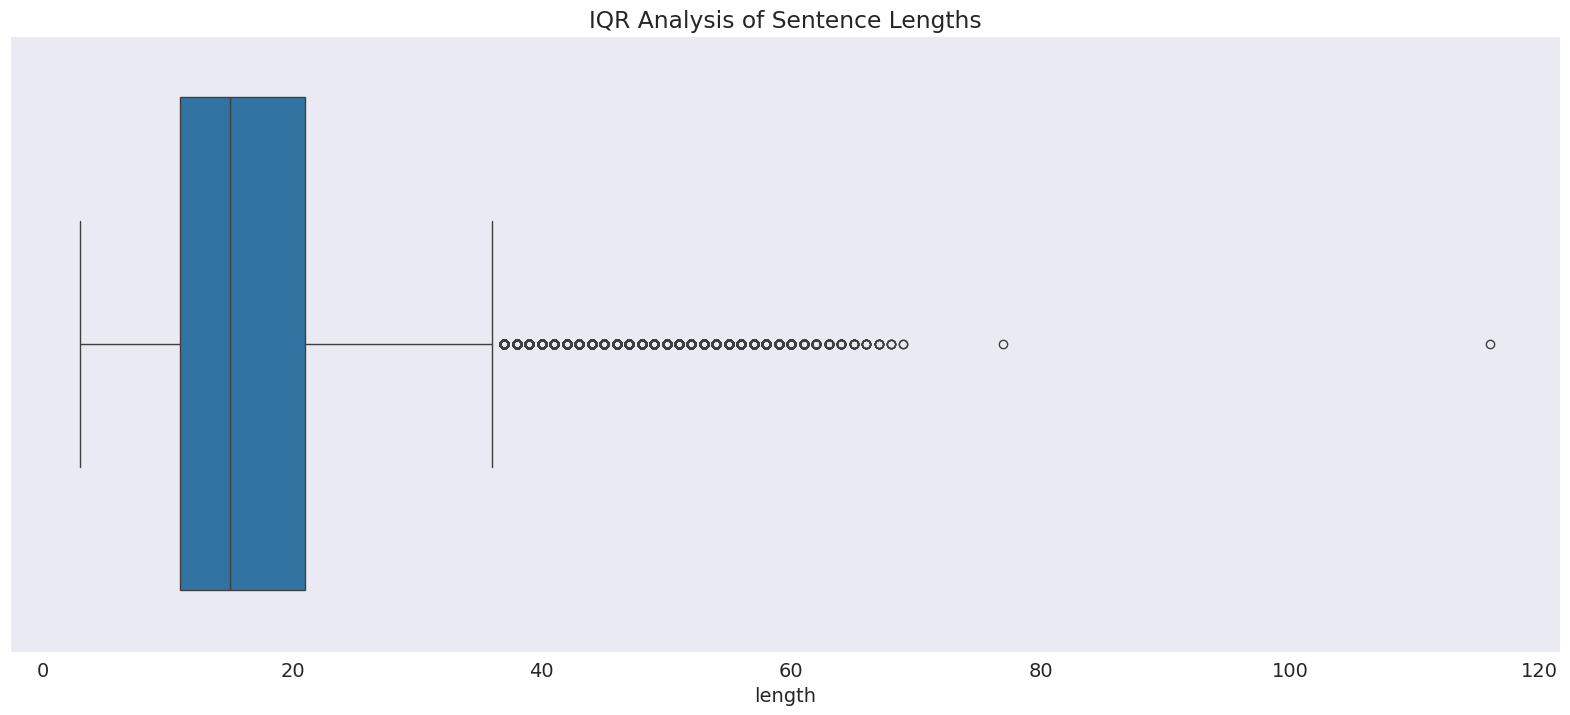

In [35]:
sns.boxplot(x='length', data=data)
plt.title('IQR Analysis of Sentence Lengths')
plt.show()

In [36]:
data.describe()

,length
count,100000.000000
mean,17.335120
std,10.495739
min,3.000000
25%,11.000000
50%,15.000000
75%,21.000000
max,116.000000


**By looking at our boxplot we will set the max_length to 50**

Accomodates some of the outlier length sentences

In [37]:
max_length = 50
print(train.loc[0, 'text'])
print(tokenizer.texts_to_sequences([train.loc[0, 'text']])[0])

startseq Product look like the picture but its flimsy and looks very cheap. I received it in a bad condition as well there were scratches and glue The straps feel like its gonna snap once i go out in it. endseq
[2, 37, 154, 60, 4, 135, 16, 91, 619, 5, 65, 18, 134, 19, 12, 7, 11, 15, 122, 22, 23, 21, 136, 149, 574, 5, 1006, 4, 1044, 268, 60, 91, 829, 1, 426, 19, 420, 87, 11, 7, 3]


### Data Generation

1. For language modelling we need to arrange our data in such a way that the variable X contains a given sequence of words and the target y contains the next word

2. Here we also need to make sure that the sentences are padded or truncated to the predetermined max length

Note: In the illustration given below all the prior words will be passed in the input and not just the seeded sequence of words. Hence the predicted word is added to the input sequence and then in turn is used for the prediction of the next word.

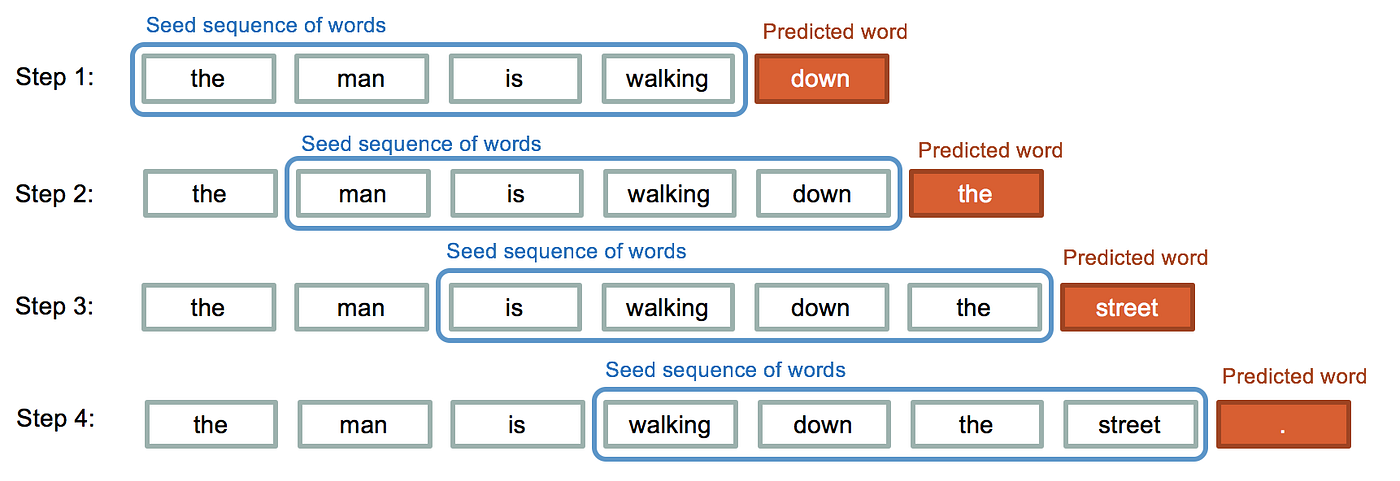

In [38]:
seq = train.loc[0, 'text'].split()
X, y = [], []
for i in range(1,len(seq)):
    in_seq, out_seq = seq[:i], seq[i]
    X.append(' '.join(in_seq))
    y.append(out_seq)

example = pd.DataFrame(columns=['input','output'])
example['input'] = X
example['output'] = y
example

,input,output
0,startseq,Product
1,startseq Product,look
2,startseq Product look,like
3,startseq Product look like,the
4,startseq Product look like the,picture
5,startseq Product look like the picture,but
6,startseq Product look like the picture but,its
7,startseq Product look like the picture but its,flimsy
8,startseq Product look like the picture but its...,and
9,startseq Product look like the picture but its...,looks


**Why We Do This:**

1. Sequence Preparation: This approach prepares the data for sequence-based models. For example, in language modeling or text generation, you might use previous words to predict the next word. This code creates pairs of input-output sequences where the model learns to predict the next word given a sequence of previous words.

2. Training Data: It creates training examples where the input is a sequence of words and the output is the next word in the sequence. This is useful for training models on tasks like predicting the next word or generating text.

In [39]:
class CustomDataGenerator(Sequence):

    def __init__(self, df, X_col, batch_size, tokenizer, vocab_size, max_length, shuffle=True):

        self.df = df.copy()
        self.X_col = X_col
        self.batch_size = batch_size
        self.tokenizer = tokenizer
        self.vocab_size = vocab_size
        self.max_length = max_length
        self.shuffle = shuffle
        self.n = len(self.df)

    def on_epoch_end(self):
        if self.shuffle:
            self.df = self.df.sample(frac=1).reset_index(drop=True)

    def __len__(self):
        return self.n // self.batch_size

    def __getitem__(self,index):

        batch = self.df.iloc[index * self.batch_size:(index + 1) * self.batch_size,:]
        X, y = self.__get_data(batch)
        return X, y

    def __get_data(self,batch):

        X, y = list(), list()
        captions = batch.loc[:, self.X_col].tolist()
        for caption in captions:
            seq = self.tokenizer.texts_to_sequences([caption])[0]
            max_len = self.max_length if len(seq) > self.max_length else len(seq)
            for i in range(1,max_len):
                in_seq, out_seq = seq[:i], seq[i]
                in_seq = pad_sequences([in_seq], maxlen=self.max_length)[0]
                out_seq = to_categorical([out_seq], num_classes=self.vocab_size)[0]
                X.append(in_seq)
                y.append(out_seq)

        X, y = np.array(X), np.array(y)

        return X, y

Here’s what each part of the code is doing:

1. Class Definition:

    a. You're defining a new class called CustomDataGenerator that inherits from Sequence, which is a special Keras class used to generate batches of data for training.

2. __init__ Method:

    a. This is the constructor method that runs when you create an instance of the class above.

          df.copy(): Makes a copy of the dataset so that the original data remains unchanged.

          X_col: Specifies which column in the dataset contains the text data.
          batch_size: Sets how many examples to process at a time (e.g., 32 sentences per batch).

          tokenizer: A tool that converts text into sequences of numbers (since the model understands numbers, not words).

          vocab_size: The total number of unique words (or tokens) that the tokenizer knows.

          max_length: The maximum length of the sequences (how many words to include in each input).

          shuffle: If True, the data will be shuffled after each epoch (complete pass through the data), which helps the model generalize better.

          self.n: Stores the total number of examples in the dataset.

    c. Inside the method, it saves these parameters as properties of the object and copies the data to make sure the original data isn't modified.

3. on_epoch_end Method:

    a. This method is called at the end of each training epoch (one full pass through the data).

    b. If shuffle is True, the data is mixed up (shuffled) so that the model doesn't always see the data in the same order. This prevents the model from memorizing the order of the data, which can help it learn better.

4. __len__ Method:

    a. This method returns the number of batches in one epoch.

    b. We calculate the number of batches by dividing the total number of examples (self.n) by the batch size (self.batch_size). This tells the model how many times it needs to call the generator to go through all the data once.

5. __getitem__ Method:

    a. This method is called to retrieve a specific batch of data.

        index: This is the batch number the model wants.

        batch: This slices the DataFrame to get only the rows for the current batch.

        self.__get_data(batch): This function processes the batch (explained next).

        X, y: These are the input data (X) and the expected output (y) that the model will use to learn.

    b. It determines which part of the dataset corresponds to the requested batch and then uses another method (__get_data) to process this batch and return the input and output data.

6. __get_data Method:

    a. This method processes a batch of text data.

    b. What are we doing here?:

        X, y = list(), list(): Start with empty lists to store the inputs and outputs.

        captions: Extracts the text data from the batch.
        
        self.tokenizer.texts_to_sequences([caption])[0]: Converts the text into a sequence of numbers (each word becomes a number).
        
        max_len: Ensures the sequence is not longer than the maximum allowed length.
        
        
        The inner loop (for i in range(1, max_len)) does the following:

            in_seq: The input sequence, which is a partial sentence.

            out_seq: The next word that the model should predict.

            pad_sequences([in_seq], maxlen=self.max_length)[0]: Pads the input sequence so that all inputs are of the same length.

            to_categorical([out_seq], num_classes=self.vocab_size)[0]: Converts the output word into a one-hot encoded vector (a binary vector where only one element is 1, representing the word).

            X.append(in_seq) and y.append(out_seq): Add the processed input and output to the lists.

            Finally, X and y are converted to NumPy arrays and returned.


In summary, this code is setting up a custom data generator that prepares and provides batches of text data to a model during training. It's designed to handle large datasets efficiently by processing the data in smaller chunks and ensuring the data is in a format that the model can use to learn.

In [40]:
train_gen = CustomDataGenerator(train, 'text', 16, tokenizer, vocab_size, max_length)
val_gen = CustomDataGenerator(val, 'text', 16, tokenizer, vocab_size, max_length)
test_gen = CustomDataGenerator(test, 'text', 16, tokenizer, vocab_size, max_length)

### Modelling


1. For building our language model, we will use a bidirectional LSTM, which is a type of RNN.

2. But before we begin, with Bidirectional LSTM, here is a brief idea about what RNNs are.

A recurrent neural network (RNN) is a type of artificial neural network which uses sequential data or time series data. These deep learning algorithms are commonly used for ordinal or temporal problems, such as language translation, natural language processing (nlp), speech recognition, and image captioning


1. Recurrent neural networks leverage backpropagation through time (BPTT) algorithm to determine the gradients, which is slightly different from traditional backpropagation as it is specific to sequence data. The principles of BPTT are the same as traditional backpropagation, where the model trains itself by calculating errors from its output layer to its input layer. These calculations allow us to adjust and fit the parameters of the model appropriately. BPTT differs from the traditional approach in that BPTT sums errors at each time step whereas feedforward networks do not need to sum errors as they do not share parameters across each layer.


2. In the process of BPTT,the RNNs suffer from either of the two problems:

2.1 Exploding Gradient: occur when the gradient is too large, and continues to become larger in the BPTT thus creating an unstable model. In this case, the model weights will grow too large, and they will eventually be represented as NaN.

2.2 Vanishing Gradient: occur when the gradient is too small, it continues to become smaller in the BPTT, updating the weight parameters until they become diminshingly small tending towards 0 and eventually become 0.


3. To address the exploding gradient problem we can clip the gradients to threshold value, however, for vanishing gradient problem we make certain changes to the simple RNN architecture

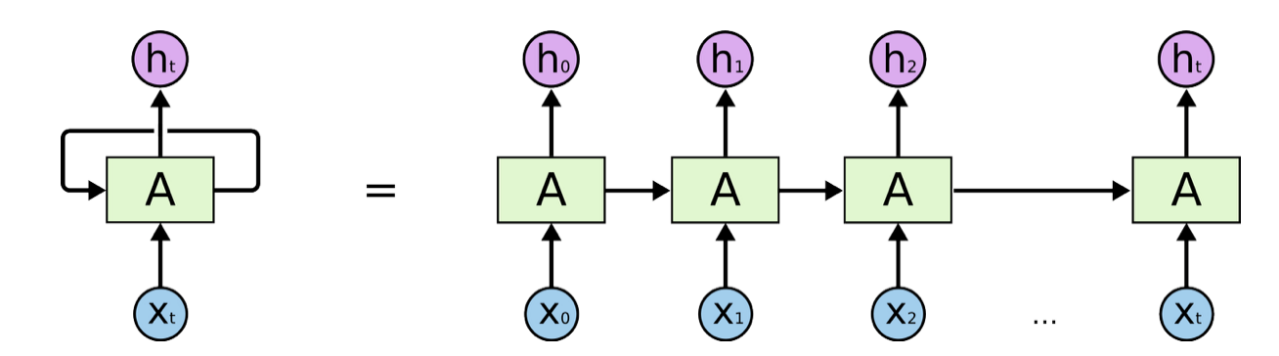

**LSTMs and GRUs**


1. Long Short Term Memory (LSTM): This is a popular RNN architecture designed to address the problem of long term dependencies. if the previous state that is influencing the current prediction is not in the recent past, the RNN model may not be able to accurately predict the current state. As an example, let’s say we wanted to predict the italicized words in following, “Alice is allergic to nuts. She can’t eat peanut butter.” The context of a nut allergy can help us anticipate that the food that cannot be eaten contains nuts. However, if that context was a few sentences prior, then it would make it difficult, or even impossible, for the RNN to connect the information. To remedy this, LSTMs have “cells” in the hidden layers of the neural network, which have three gates–an input gate, an output gate, and a forget gate. These gates control the flow of information which is needed to predict the output in the network.

2. Gated Recurrent Units (GRUs): This RNN variant is similar the LSTMs as it also works to address the short-term memory problem of RNN models. Instead of using a “cell state” regulate information, it uses hidden states, and instead of three gates, it has two—a reset gate and an update gate. Similar to the gates within LSTMs, the reset and update gates control how much and which information to retain.

3. Bidirectional recurrent neural networks (BRNN): These are a variant network architecture of RNNs. While unidirectional RNNs can only drawn from previous inputs to make predictions about the current state, bidirectional RNNs pull in future data to improve the accuracy of it. If we return to the example of “feeling under the weather” earlier in this article, the model can better predict that the second word in that phrase is “under” if it knew that the last word in the sequence is “weather.”

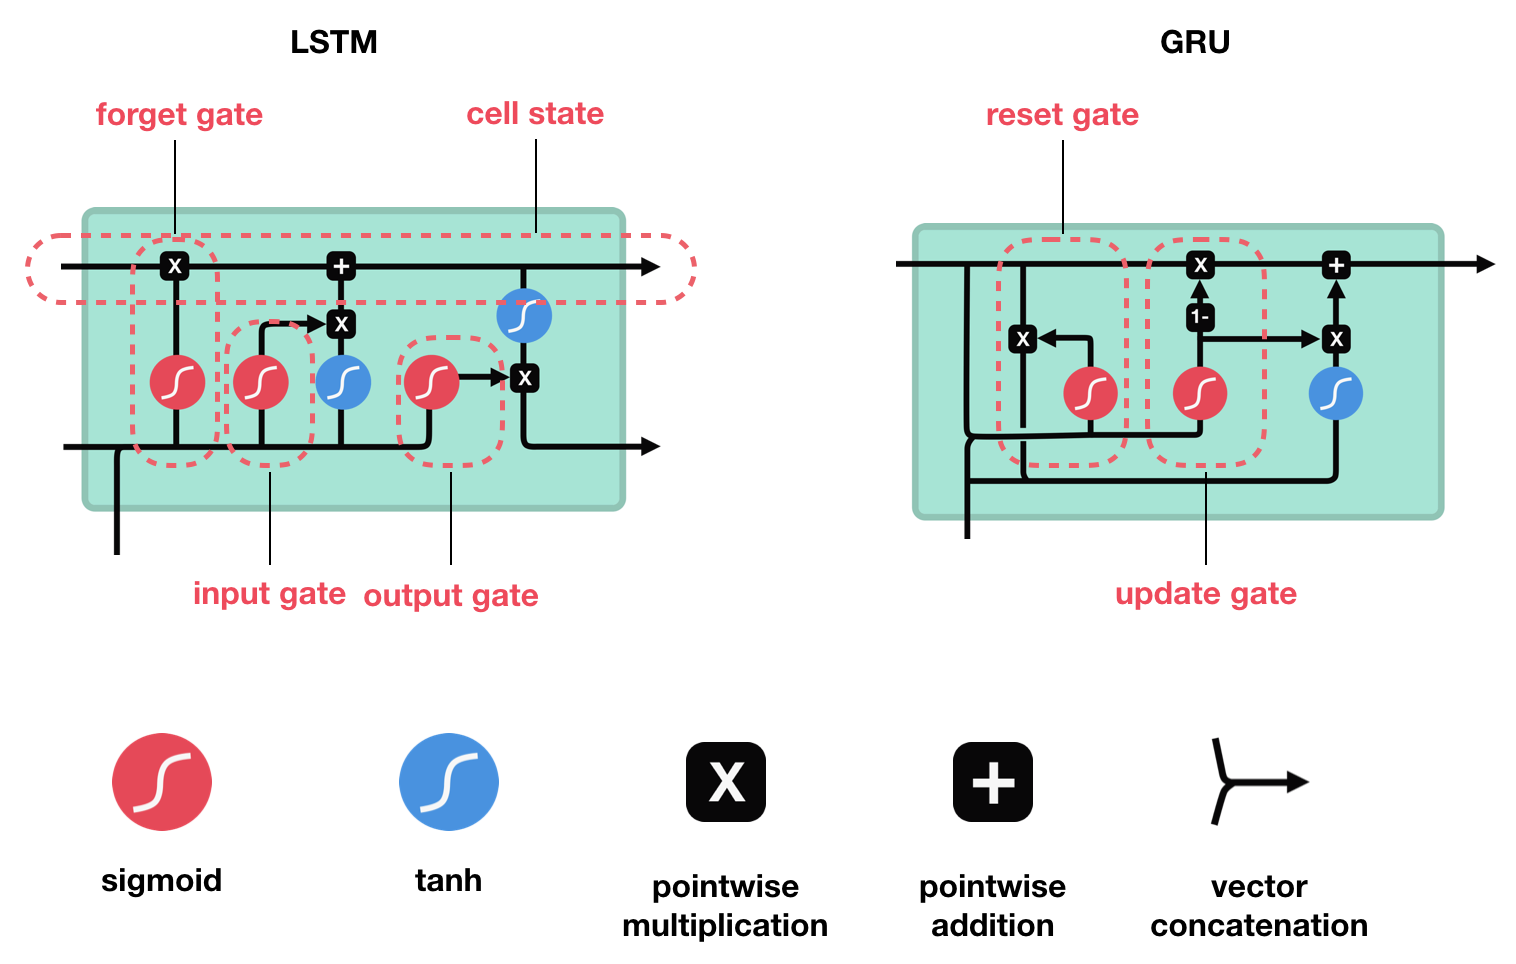

In [41]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Embedding, LSTM, add, Concatenate, Reshape,
                                     concatenate, Bidirectional, Dense, Input)

In [42]:
input_layer = Input(shape=(50,))
x = Embedding(vocab_size, 64)(input_layer)
x = Bidirectional(LSTM(100))(x)
output_layer = Dense(vocab_size, activation='softmax')(x)

model = Model(inputs=[input_layer], outputs=output_layer)
model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam())

 Let’s break this down in simple terms:

1. Input Layer:

This is the starting point of the model, where you define the shape of the input data. In this case, the input will be sequences of 50 words (or tokens).

2. Embedding Layer:

This layer takes the input (which is in numerical form) and converts each word into a dense vector of 64 values. This helps the model understand the meaning of words by placing them in a space where similar words are closer together.

3. Bidirectional LSTM Layer:

LSTM (Long Short-Term Memory) is a type of layer that can capture patterns in sequences. Bidirectional means it looks at the sequence from both the beginning and the end, which helps it understand the context better. The number 100 here is the size of the output from this layer (it captures 100 features from the input sequence).

4. Output Layer:

This layer converts the output from the LSTM into a prediction. It has as many units as there are words in your vocabulary (so the model can predict any word). The "softmax" activation function is used here to turn these predictions into probabilities, showing the likelihood of each word being the next word in the sequence.

5. Model Creation:

The model is created by specifying the input and output layers.

6. Model Compilation:

Finally, the model is prepared for training. It's set up to use "categorical crossentropy" as the loss function, which measures how well the model’s predictions match the actual next words. The optimizer, "Adam," helps the model update its internal settings to improve over time.

In [43]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 50, 64)              │         104,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 200)                 │         132,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1639)                │         329,439 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 566,335 (2.16 MB)

 Trainable params: 566,335 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler

In [49]:
model_name = "model.keras"
checkpoint = ModelCheckpoint(model_name,
                            monitor="val_loss",
                            mode="min",
                            save_best_only = True,
                            verbose=1)

es = EarlyStopping(monitor='val_loss',min_delta = 0, patience = 5, verbose = 1, restore_best_weights=True)

def scheduler(epoch, lr):
    if epoch < 8:
        return float(lr)
    else:
        return float(lr * tf.math.exp(-0.1*epoch))


lr_scheduler = LearningRateScheduler(scheduler, verbose=1)

Explanation of what this code does:

1. Model Checkpoint:

    You're setting up a system to save your model during training. The model will be saved to a file named "model.keras."

    The ModelCheckpoint function is used to monitor the "validation loss" (how well the model is doing on unseen data).

    The model is only saved when it improves, meaning when the validation loss decreases ("mode" is set to "min").

    save_best_only=True ensures that only the best version of the model is saved, avoiding overwriting it with worse-performing versions.

    verbose=1 provides updates in the console whenever the model is saved.

2. Early Stopping:

    EarlyStopping is used to stop training early if the model stops improving.

    It monitors the "validation loss" and will stop training if it doesn't improve after a certain number of epochs (in this case, 5 epochs).

    min_delta=0 means that even the smallest improvement counts.

    restore_best_weights=True ensures that when training stops, the model’s weights are reverted to the best ones found during training.

3. Learning Rate Scheduler:

    You define a function called scheduler that controls how the learning rate (which determines how much the model’s weights are updated during training) changes over time.

    For the first 8 epochs, the learning rate stays the same.

    After 8 epochs, the learning rate gradually decreases, following an exponential decay.

    The LearningRateScheduler uses this function to adjust the learning rate during training, which can help the model converge more effectively.

In summary, this code is about managing the training process by:

    Saving the best model.
    Stopping training early if it's not improving.
    Adjusting the learning rate over time to fine-tune the training process.

In [50]:
history = model.fit(train_gen, validation_data=val_gen, epochs=17, callbacks=[checkpoint, es, lr_scheduler])


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/17
5311/5312 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.5323
Epoch 1: val_loss improved from inf to 3.60823, saving model to model.keras
5312/5312 ━━━━━━━━━━━━━━━━━━━━ 141s 26ms/step - loss: 3.5323 - val_loss: 3.6082 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/17
5312/5312 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.5108
Epoch 2: val_loss improved from 3.60823 to 3.60114, saving model to model.keras
5312/5312 ━━━━━━━━━━━━━━━━━━━━ 142s 27ms/step - loss: 3.5108 - val_loss: 3.6011 - learning_rate: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/17
5309/5312 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3.4928
Epoch 3: val_loss improved from 3.60114 to 3.59596, saving model to model.keras
5312/5312 ━━━━━━━━━━━━━━━━━━━━ 142s 27ms/step - loss: 3.4928 - val_loss: 3.5960 - learning_rate: 0.0010

E

### Model Inferences


1. The model has overfit, but it can be resolved using dropout and regularization techniques

2. One major reason behind the low convergence of model is, as there are many output neurons in the output layer with the softmax function, the model will suffer a bit in confidently predicting the probabilities of the next word. We will use a special decoding technque in the later section to accurately predict the sentences

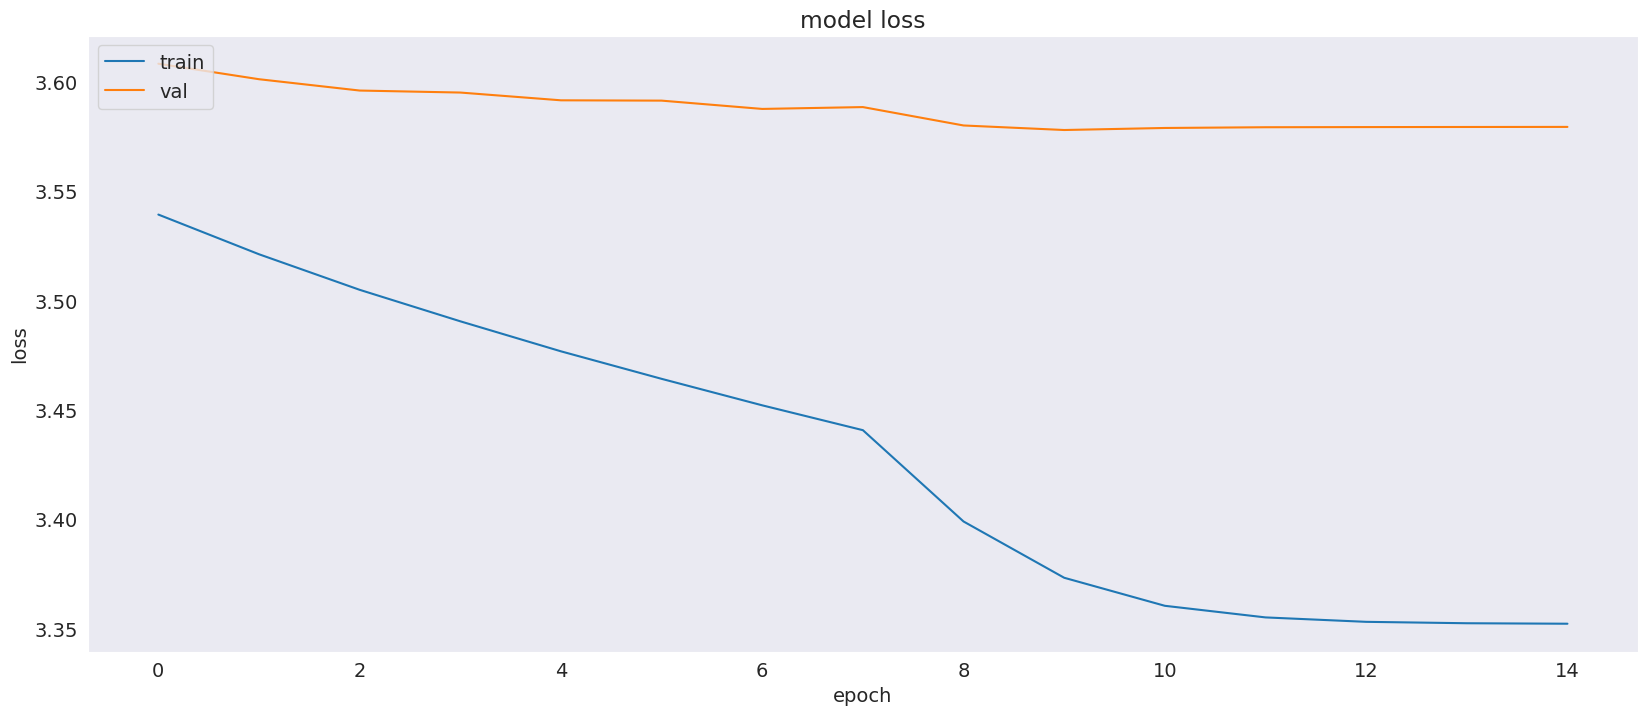

In [51]:
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [52]:
def idx_to_word(integer,tokenizer):

    for word, index in tokenizer.word_index.items():
        if index==integer:
            return word
    return None

### Greedy Search Decoding


In greedy search, at each decoding step, the decoder selects the token with the highest probability as the next token in the output sequence. This process is repeated until an end-of-sequence token is generated, indicating that the output sequence is complete.

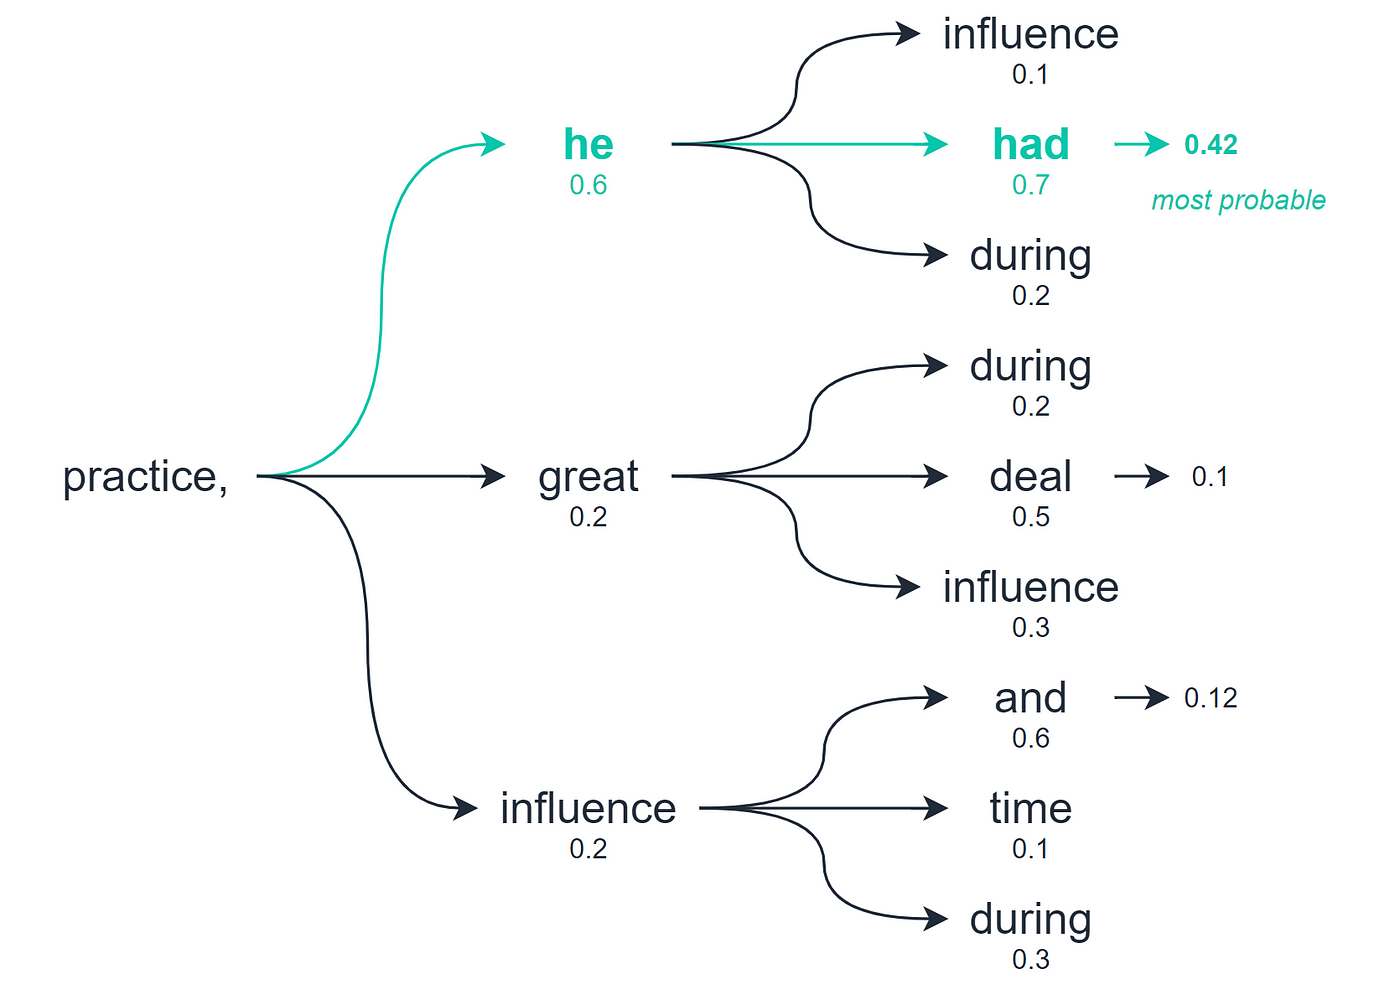

In [53]:
def predict_sentence(text, model, tokenizer, max_length):

    in_text = "startseq " + text
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], max_length)

        y_pred = model.predict(sequence, verbose=0)
        y_pred = np.argmax(y_pred, axis=1)

        word = idx_to_word(y_pred, tokenizer)

        if word is None:
            break

        in_text+= " " + word

        if word == 'endseq':
            break

    return in_text

Explanation of the Code:

1. Starting the Sentence:

    The function starts with a piece of text (given as text) and adds "startseq" to the beginning. This marks the start of a sentence.

2. Generating the Sentence:

    The code enters a loop that runs up to max_length times. This loop will generate words one by one to form a complete sentence.

    Inside the loop, the current sentence (in_text) is converted into a sequence of numbers using a tokenizer. The tokenizer changes the words into numbers that the model can understand.

3. Predicting the Next Word:

    The sequence of numbers is then padded to make sure it’s the right length for the model.

    The model predicts the next word in the sequence based on the input so far. It outputs probabilities for each word in the vocabulary.

    The function picks the word with the highest probability (np.argmax(y_pred, axis=1)). This is the greedy part—choosing the most likely word without considering alternatives.

4. Adding the Word to the Sentence:

    The predicted word is converted back from a number to a word using the idx_to_word function.

    If no word is found, the loop breaks.

    The predicted word is added to the sentence (in_text), making the sentence longer with each iteration.

5. Stopping Conditions:

    If the predicted word is "endseq" (a special token indicating the end of the sentence), the loop stops early.

6. Returning the Sentence:

    Finally, the function returns the complete sentence, which now includes all the predicted words.


**Summary:**

This function generates a sentence by predicting one word at a time. It starts with some initial text, uses a model to predict the next word, and keeps adding words until it reaches a maximum length or an end token. Since it always picks the most likely word at each step, it’s using a greedy search strategy.

### Beam Search Decoding


Unlike the greedy search algorithm, which selects the highest probability token at each time step, beam search considers a fixed number of the most likely candidates, called the beam width, and selects the sequence with the highest joint probability.

The algorithm works by maintaining a set of partially decoded sequences, called the beam, with each sequence represented by a node in the search tree. At each time step, the decoder generates a set of possible candidates by expanding the beam nodes and computing their conditional probabilities. The beam width limits the number of candidates to consider at each time step, and only the candidates with the highest conditional probabilities are retained in the beam.

The algorithm continues to generate candidates and update the beam until the end-of-sequence token is generated, at which point the candidate with the highest joint probability is selected as the output sequence.


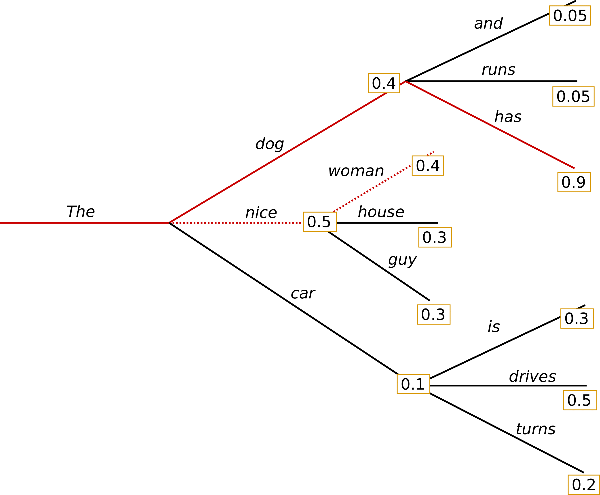

In [54]:
def beam_search_predictions(text, beam_index = 3):
    in_text = "startseq " + text
    start = tokenizer.texts_to_sequences([in_text])[0]
    start_word = [[start, 0.0]]
    while len(start_word[0][0]) < max_length:
        temp = []
        for s in start_word:
            par_caps = pad_sequences([s[0]], maxlen=max_length)
            preds = model.predict(par_caps, verbose=0)
            word_preds = np.argsort(preds[0])[-beam_index:]
            for w in word_preds:
                next_cap, prob = s[0][:], s[1]
                next_cap.append(w)
                prob += preds[0][w]
                temp.append([next_cap, prob])

        start_word = temp
        start_word = sorted(start_word, reverse=False, key=lambda l: l[1])
        start_word = start_word[-beam_index:]

    start_word = start_word[-1][0]
    intermediate_caption = [idx_to_word(i, tokenizer) for i in start_word]
    final_caption = []

    for i in intermediate_caption:
        if i != 'endseq':
            final_caption.append(i)
        else:
            break

    final_caption = ' '.join(final_caption[1:])
    return final_caption

Simple Explanation of the Code:

1. Starting the Sentence:

    The function begins with an initial text (given as text) and adds "startseq" to it. This marks the start of a sentence.

    It then converts this starting text into a sequence of numbers that the model can understand.

2. Initial Setup:

    start_word is a list that holds potential sequences. Each entry in the list consists of a sequence of words (as numbers) and its cumulative probability (how likely this sequence is overall).

    Initially, start_word contains just one sequence—the starting text with a probability of 0.

3. Generating the Sentence with Beam Search:

    The code enters a loop to generate words one by one until the sequence reaches the maximum length (max_length).

    In each iteration, it tries to expand all the sequences in start_word by predicting the next possible words.

    For each possible word, it creates a new sequence that includes this word and updates the cumulative probability for this sequence.

    All these new sequences are stored in a temporary list temp.

4. Selecting the Best Sequences:

    After exploring all possible next words, the code sorts the sequences in temp based on their cumulative probability.

    It keeps only the top beam_index sequences (the best ones) and discards the rest. This is the core of beam search—it balances between exploring multiple options and focusing on the most promising ones.

5. Finalizing the Sentence:

    Once the loop finishes, the best sequence (the one with the highest probability) is selected from start_word.

    The sequence of numbers is converted back into words using idx_to_word.

    The function then constructs the final sentence, stopping when it encounters the "endseq" token, which indicates the end of the sentence.

6. Returning the Sentence:

    The final sentence, minus the "startseq" token and any words after "endseq," is returned as the output.


**Summary:**

This code implements beam search to generate a sentence. Instead of just picking the most likely word at each step (like greedy search), it keeps track of multiple possible sequences and selects the best one based on the overall probability. This makes the generated sentence more accurate and meaningful.

In [55]:
sentences = ["overall the product is okay",
             "exactly like picture",
             "price could have been cheaper",
             "will recommend this item",
             "useful packaging"]

for sentence in sentences:
    print("Greedy Search: ", predict_sentence(sentence, model, tokenizer, 50))
    print("Beam Search: ", beam_search_predictions(sentence))
    print("\n")

Greedy Search:  startseq overall the product is okay but the <OOV> is not <OOV> endseq
Beam Search:  overall the product is okay for the price i paid will buy again


Greedy Search:  startseq exactly like picture endseq
Beam Search:  exactly like picture material is soft and comfortable


Greedy Search:  startseq price could have been cheaper and <OOV> to <OOV> the <OOV> <OOV> endseq
Beam Search:  price could have been cheaper than retail shop


Greedy Search:  startseq will recommend this item and fast delivery endseq
Beam Search:  will recommend this item and fast delivery too


Greedy Search:  startseq useful packaging and delivery was fast endseq
Beam Search:  useful packaging and delivery was fast too




## Conlclusion


1. We can see the beam search produces much more meaningful results than the greedy search

2. The model can be tweaked to perform better by making several inclusions
In the upcoming notebooks, I will cover sequence to sequence models, attention, and introduction to Transformers and LLMs.